<a href="https://colab.research.google.com/github/luanamouraa/Projeto-A2/blob/main/A2_asla_oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto A2 - Lavínia Zactiti e Luana Moura
## Análise exploratória das músicas mais ouvidas no Spotify em 2023.


Tese: As primeiras 10 músicas do top global de 2023 no Spotify estão nesse ranking por possuírem um alto índice de dançabilidade.


Fonte do dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/

## Importando a base de dados

In [ ]:
# @title
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carregar o arquivo CSV
spotify = pd.read_csv('spotify23.csv', encoding='ISO-8859-1')

# Exibir os dados em forma de tabela
print(tabulate(spotify.head(20), headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════════════════════════════════════════════╤════════════════════════════╤════════════════╤═════════════════╤══════════════════╤════════════════╤════════════════════════╤═════════════════════╤════════════╤══════════════════════╤═══════════════════╤═══════════════════════╤════════════════════╤════════════════════╤═══════╤═══════╤════════╤══════════════════╤═════════════╤════════════╤══════════════════╤══════════════════════╤══════════════╤═════════════════╕
│    │ track_name                                              │ artist(s)_name             │   artist_count │   released_year │   released_month │   released_day │   in_spotify_playlists │   in_spotify_charts │    streams │   in_apple_playlists │   in_apple_charts │   in_deezer_playlists │   in_deezer_charts │ in_shazam_charts   │   bpm │ key   │ mode   │   danceability_% │   valence_% │   energy_% │   acousticness_% │   instrumentalness_% │   liveness_% │   speechiness_% │
╞════╪══════════════════════════════════

In [ ]:
spotify.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

## Limpeza dos dados

Para essa limpeza, removemos todos os espaços que continham "nan" para 0, com o comando ".dropna()". Isso auxiliará na análise exploratória.

In [ ]:
spotify = spotify.dropna()
print(tabulate(spotify.head(20), headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════════════════════════════════════════╤══════════════════════════════════════════╤════════════════╤═════════════════╤══════════════════╤════════════════╤════════════════════════╤═════════════════════╤════════════╤══════════════════════╤═══════════════════╤═══════════════════════╤════════════════════╤════════════════════╤═══════╤═══════╤════════╤══════════════════╤═════════════╤════════════╤══════════════════╤══════════════════════╤══════════════╤═════════════════╕
│    │ track_name                                         │ artist(s)_name                           │   artist_count │   released_year │   released_month │   released_day │   in_spotify_playlists │   in_spotify_charts │    streams │   in_apple_playlists │   in_apple_charts │   in_deezer_playlists │   in_deezer_charts │ in_shazam_charts   │   bpm │ key   │ mode   │   danceability_% │   valence_% │   energy_% │   acousticness_% │   instrumentalness_% │   liveness_% │   speechiness_% │
╞════╪════════════════

# Análise Exploratória

Variáveis presentes na base de dados "spotify"

* track_name: Nome da música

* artist(s)_name: Nome dos artistas da música

* artist_count: Número de artistas contribuintes da música

* released_year: Ano que a música foi lançada

* released_month: Mês que a música foi lançada

* released_day: Dia que a música foi lançada

* in_spotify_playlists: Número de playlists do Spotify que a música está incluída

* in_spotify_charts: Posições e classificações da música na plataforma Spotify com base em sua popularidade.

* streams: Número total de streams da música no Spotify

* in_apple_playlists: Número de playlists do Apple Music que a
música está incluída

* in_apple_charts: Posições e classificações da música na plataforma Apple Music com base em sua popularidade.

* in_deezer_playlists: Número de playlists do Deezer que a música está incluída

* in_deezer_charts: Posições e classificações da música na plataforma Deezer com base em sua popularidade.

* in_shazam_charts: Posições e classificações da música na plataforma Shazam com base em sua popularidade.

* bpm: Beats por minuto, medida de tempo da música

* key: Tonalidade da música

* mode: Modo da música, descrevem as características tonais de uma peça musical (Major and Minor/Maior e Menor)

* danceability_%: Porcentagem que indica o quão adequada é para dançar

* valence_%: valência - positividade do conteúdo da música.

* energy_%: Nível de energia da música

* acousticness_%: Quantidade de som acústico na música

* instrumentalness_%: Quantidade de instrumental na música

* liveness_%: Presença de elementos de uma apresentação ao vivo da música

* speechiness_%: Quantidade de palavras ditas na música

## Variáveis categóricas x Variáveis quantitativas

* Categóricas:

O nome dos artistas da música é uma variável que se enquadra nas variáveis categóricas, já que identifica o cantor da canção e, por conseguinte, cria um agrupamento de músicas desse respectivo cantor. Um exemplo desse conjunto seriam as diversas músicas da "Taylor Swift" dentro dessa classificação do Spotify.

O "mode", modo da música, é considerado uma variável categórica, uma vez que classifica suas características tonais, podendo ser Maior ou Menor e, portanto, criando os grupos de músicas com tons maiores e tons menores.

As variáveis de data de lançamento podem ser consideradas tanto categóricas, quanto quantitativas, dependendo da maneira que forem analisadas. No caso dessa análise específica, utilizaremos elas como categóricas, pois estamos identificando músicas que foram escutadas em 2023, sendo elas lançadas antes ou durante esse período, mas que pensamos que não interferem na análise a seguir.

* Quantitativas:

As variáveis quantitativas são aquelas que representam quantidades numéricas e podem ser medidas ou contadas. Sendo assim, escolhemos algumas delas para analisarmos, pois serão as principais para o nosso processo de exploração de dados com base na nossa tese.

Iremos explorar as variáveis de dançabilidade, energia e valência a fundo, com o fim de descobrir se elas estão, de fato, correlacionadas com a fama das 10 músicas mais ouvidas pelos usuários do Spotify.

Além delas, a maior parte das outras variáveis dessa base de dados também é quantitativa, como a quantidade de streams da música, a quantidade de vezes que a música aparece em uma playlist de alguma plataforma e os níveis técnicos da música, como tonalidade, palavras na música, entre outros.

* Danceability (%):
Quanto mais próximo de 1, maior a adequação da música para dançar. Um valor próximo de 1 indica que a música tem características que a tornam propícia para a dança.

* Energy (%):
Quanto mais próximo de 1, maior é o nível de energia da música. Um valor próximo de 1 sugere uma música mais energética, o que pode ser associado a uma maior atratividade para os ouvintes.

* Valence (%):
Quanto mais próximo de 1, maior é a positividade do conteúdo da música. Um valor próximo de 1 sugere uma atmosfera mais positiva na música.

Assim, se encontrarmos músicas com índices de dançabilidade, energia e valência próximos de 1, poderemos fortalecer a tese de que essas características estão associadas às músicas mais escutadas no Spotify.

## Análise Unidimensional




A análise unidimensional se refere à análise de dados ou fenômenos que envolvem apenas uma variável, uma dimensão ou uma característica específica que no nosso caso são: dançabilidade, energia e valência.

O resumo estatístico (top_10.describe()) é uma análise unidimensional que fornece estatísticas descritivas básicas para cada variável quantitativa individualmente.

A visualização do pairplot (sns.pairplot(top_10)) é uma análise unidimensional que mostra a distribuição e relação entre variáveis quantitativas. Cada gráfico no pairplot representa uma combinação de duas variáveis.


Resumo estatístico para variáveis quantitativas das top 10 músicas:
       artist_count  released_year  released_month  released_day  \
count     10.000000      10.000000       10.000000     10.000000   
mean       1.400000    2022.600000        5.300000     16.400000   
std        0.516398       1.264911        1.828782      8.221922   
min        1.000000    2019.000000        3.000000      1.000000   
25%        1.000000    2023.000000        3.500000     14.250000   
50%        1.000000    2023.000000        5.500000     16.500000   
75%        2.000000    2023.000000        6.750000     21.750000   
max        2.000000    2023.000000        8.000000     30.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count             10.000000          10.000000           10.000000   
mean            2445.400000          76.900000           62.000000   
std             2133.126355          35.747416           28.542366   
min              553.000000          4

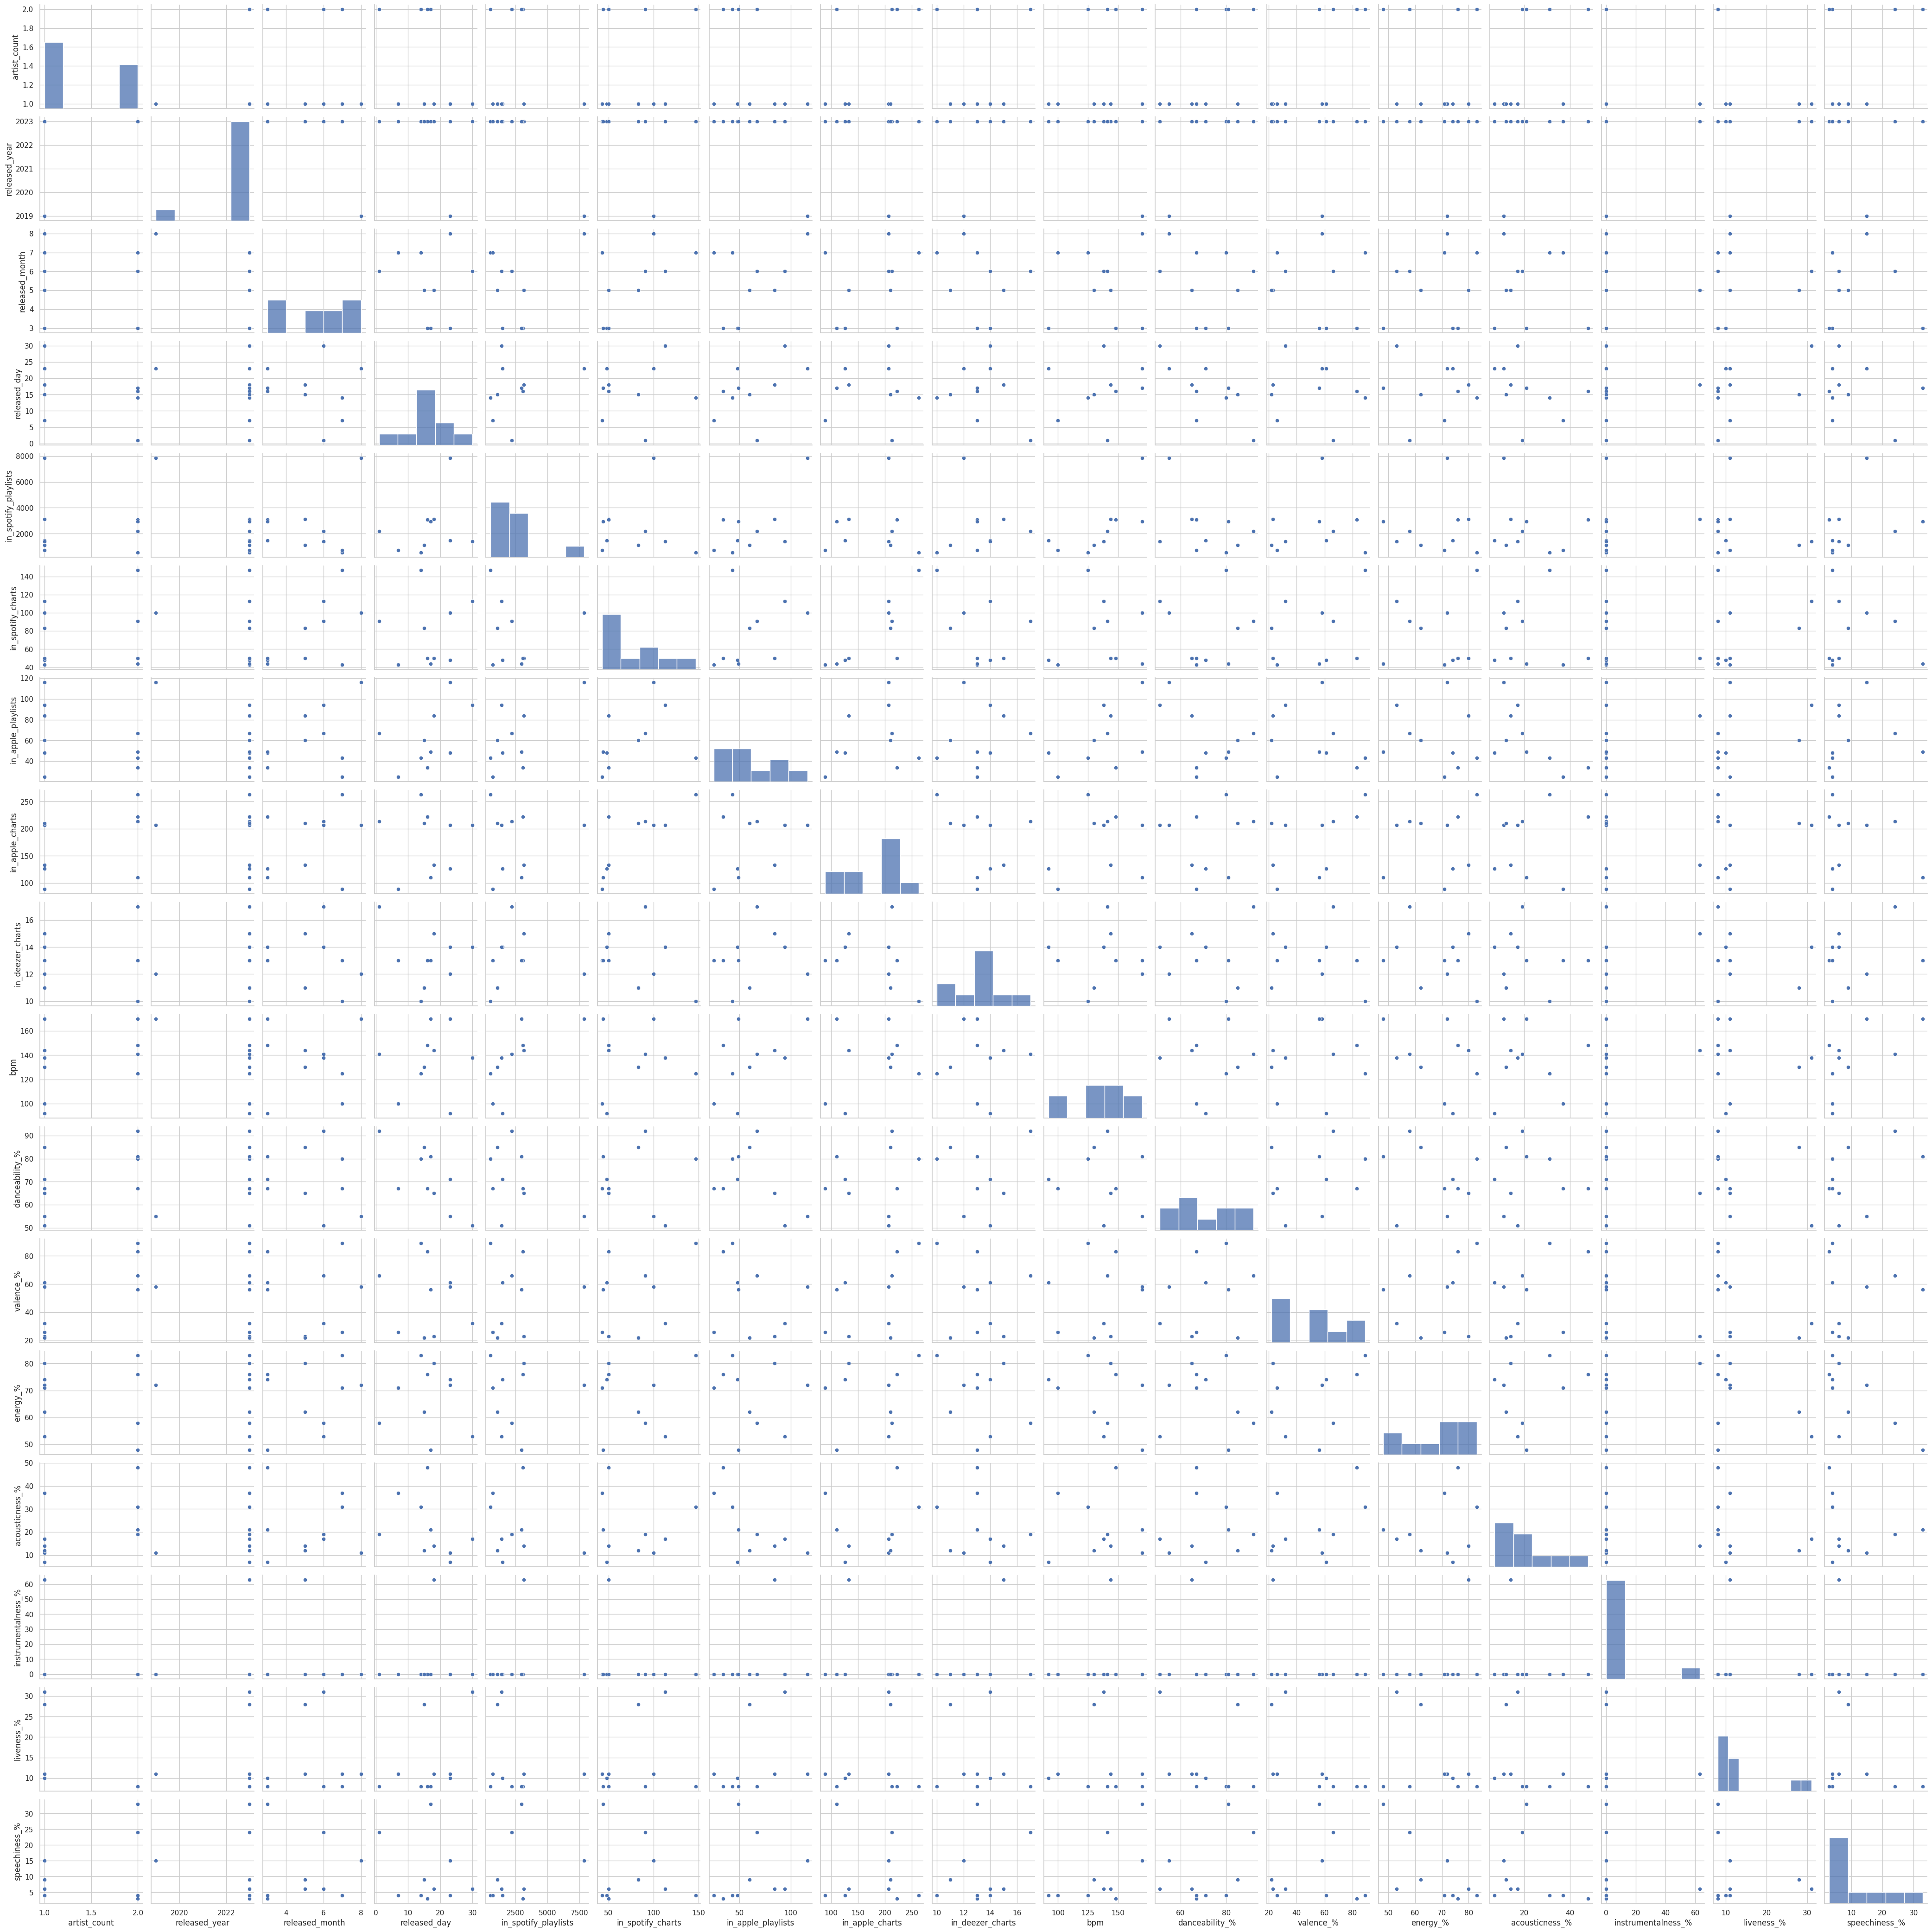

In [ ]:
df = pd.read_csv('spotify23.csv', encoding='latin1')

# Limitar a exibição às top 10 músicas
top_10 = df.head(10)

# Resumo estatístico para variáveis quantitativas das top 10 músicas
print("\nResumo estatístico para variáveis quantitativas das top 10 músicas:")
print(top_10.describe())

# Visualização de variáveis quantitativas das top 10 músicas mais ouvidas de acordo com as variáveis
sns.pairplot(top_10)
plt.show()

Estatísticas de danceability_%:
count    817.000000
mean      67.391677
std       14.688458
min       23.000000
25%       57.000000
50%       70.000000
75%       79.000000
max       96.000000
Name: danceability_%, dtype: float64


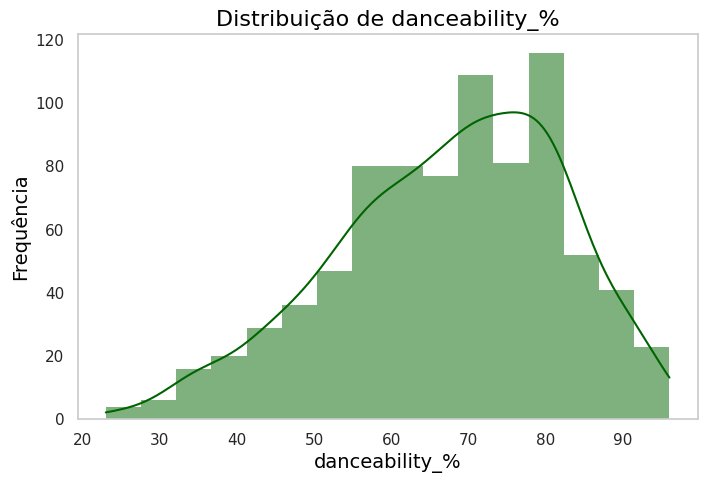

Estatísticas de energy_%:
count    817.000000
mean      64.362301
std       16.107587
min       14.000000
25%       53.000000
50%       66.000000
75%       76.000000
max       97.000000
Name: energy_%, dtype: float64


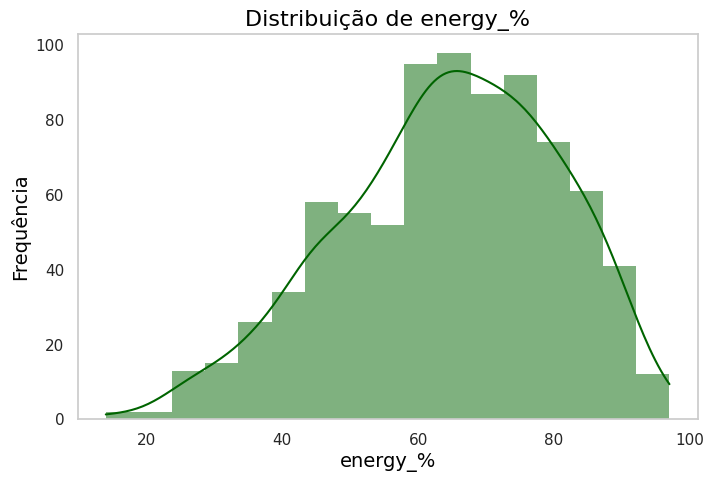

Estatísticas de valence_%:
count    817.000000
mean      51.201958
std       23.620978
min        4.000000
25%       32.000000
50%       51.000000
75%       70.000000
max       97.000000
Name: valence_%, dtype: float64


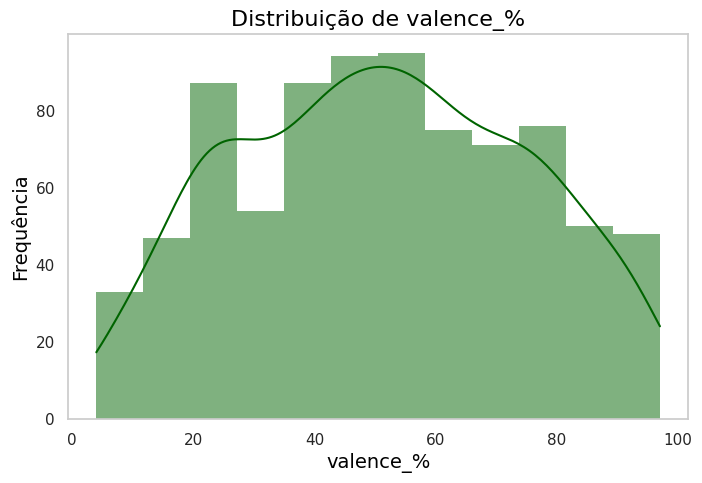

In [ ]:
cores = ["#006400"]

def analise_unidimensional(variavel):
    """
    Esta função realiza a análise unidimensional de uma variável.
    Ela imprime estatísticas descritivas e gera um histograma.
    """
    # Verificando se os dados são numéricos
    if pd.api.types.is_numeric_dtype(spotify[variavel]):
        # Mostra estatísticas básicas
        print(f"Estatísticas de {variavel}:")
        print(spotify[variavel].describe())

        # Gerando um histograma sem os quadrados no fundo
        plt.figure(figsize=(8, 5))
        sns.histplot(spotify[variavel], kde=True, color=cores[0], bins='auto', edgecolor='none')
        plt.title(f"Distribuição de {variavel}", fontsize=16, color="black")
        plt.xlabel(variavel, fontsize=14, color="black")
        plt.ylabel('Frequência', fontsize=14, color="black")
        plt.grid(False)  # Remover a grade
        plt.show()
    else:
        print(f"A variável {variavel} não contém dados numéricos. Considere usar outro tipo de gráfico.")

# Lista das variáveis que queremos analisar
variaveis = ['danceability_%', 'energy_%', 'valence_%']

# Realiza a análise para cada variável
for var in variaveis:
    analise_unidimensional(var)


## Análise Bidimensional

Calculamos a média, desvio médio, desvio padrão, variância e correlação das variáveis de interesse, que são: 'danceability', 'energy' e 'valence'.

In [ ]:
# Calcular as médias
variaveis_interesse = spotify[['danceability_%', 'energy_%', 'valence_%']]
medias = variaveis_interesse.mean()
print("Média:")
print(medias)

# Calcular os desvios médios
desvio_medio = np.mean(np.abs(variaveis_interesse - variaveis_interesse.mean()))
print("\nDesvio Médio:")
print(desvio_medio)

# Calcular os desvios padrões
desvio_padrao = np.std(variaveis_interesse)
print("\nDesvio Padrão:")
print(desvio_padrao)

# Calcular as variâncias
variancia = np.var(variaveis_interesse)
print("\nVariância:")
print(variancia)


Média:
danceability_%    67.391677
energy_%          64.362301
valence_%         51.201958
dtype: float64

Desvio Médio:
danceability_%    12.011413
energy_%          13.078514
valence_%         19.823287
dtype: float64

Desvio Padrão:
danceability_%    14.679466
energy_%          16.097726
valence_%         23.606517
dtype: float64

Variância:
danceability_%    215.486736
energy_%          259.136792
valence_%         557.267658
dtype: float64


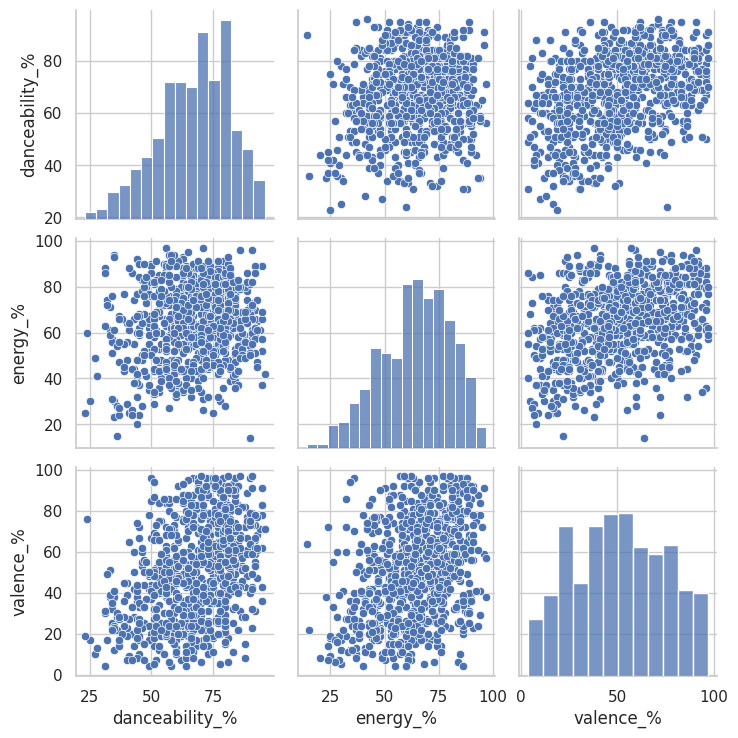

In [ ]:
# Pairplot para análise bidimensional
sns.pairplot(variaveis_interesse)
plt.show()

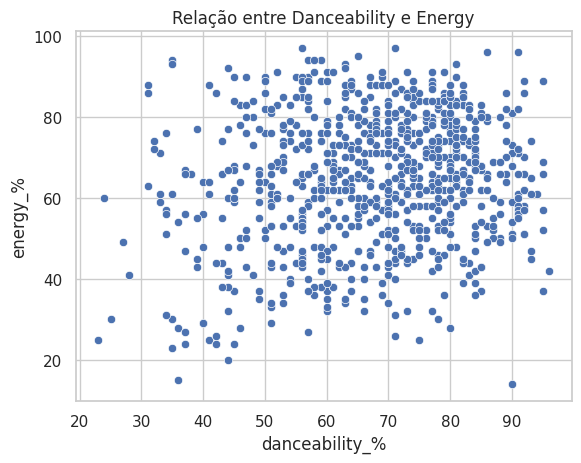

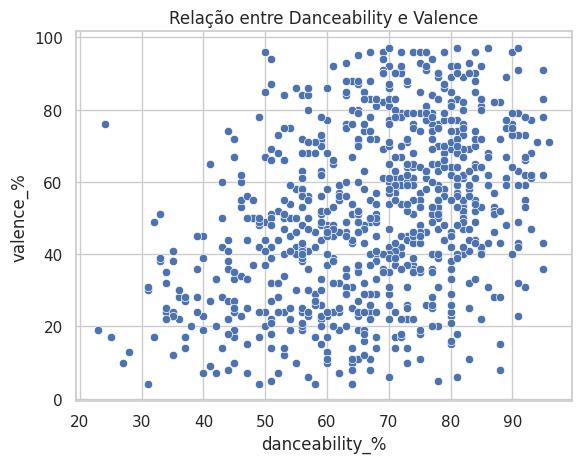

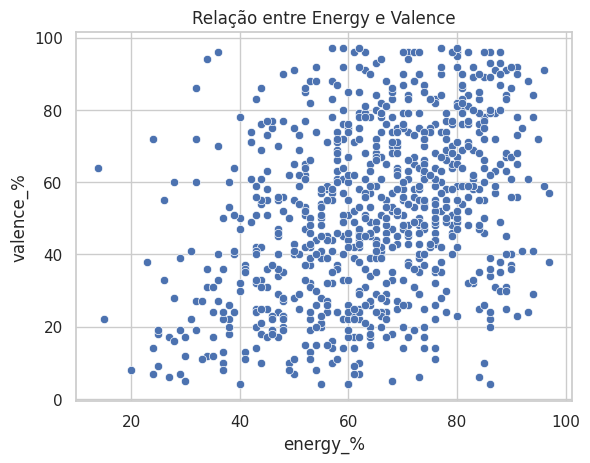

In [ ]:
# Gráficos de dispersão individuais para cada par de variáveis

sns.scatterplot(x='danceability_%', y='energy_%', data=variaveis_interesse)
plt.title('Relação entre Danceability e Energy')
plt.show()

sns.scatterplot(x='danceability_%', y='valence_%', data=variaveis_interesse)
plt.title('Relação entre Danceability e Valence')
plt.show()

sns.scatterplot(x='energy_%', y='valence_%', data=variaveis_interesse)
plt.title('Relação entre Energy e Valence')
plt.show()


## Correlação entre variáveis

Para uma melhor identificação da correlação entre as três variáveis, criamos um mapa de calor que indica a proximidade de cada uma em relação à outra.


Correlação:
                danceability_%  energy_%  valence_%
danceability_%        1.000000  0.157970   0.389729
energy_%              0.157970  1.000000   0.349736
valence_%             0.389729  0.349736   1.000000


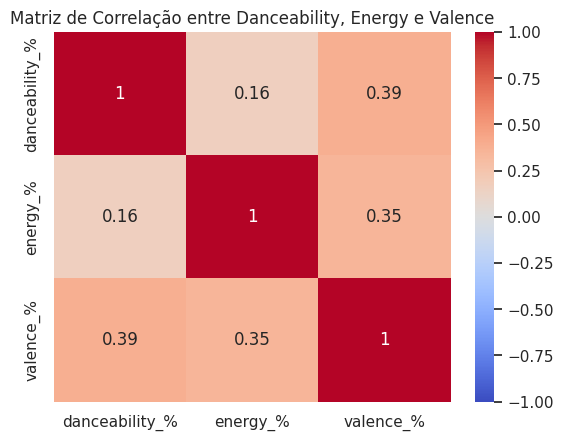

In [ ]:
# Calcular as correlações
correlacoes = variaveis_interesse.corr()
print("\nCorrelação:")
print(correlacoes)

# Calcular a matriz de correlação
matriz_correlacao = variaveis_interesse.corr()

# Plotar um mapa de calor para visualizar as correlações
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Danceability, Energy e Valence')
plt.show()

Legenda do Mapa de Calor:

Próximo de 1: Correlação positiva forte.

Próximo de -1: Correlação negativa forte.

Próximo de 0: Correlação fraca ou inexistente.

# Testando a Tese

Finalmente, após as análises unidimensionais e bidimensionais, considerando as variáveis existentes na base de dados, as estatísticas descritivas e a correlação entre as variáveis de interesse, conseguimos chegar em um resultado.

Ao analisar os dados, criamos o seguinte gráfico:


Contagem de valores únicos para variáveis categóricas nas top 10 músicas:
track_name: 10 unique values
artist(s)_name: 10 unique values
streams: 10 unique values
in_deezer_playlists: 10 unique values
in_shazam_charts: 10 unique values
key: 5 unique values
mode: 2 unique values


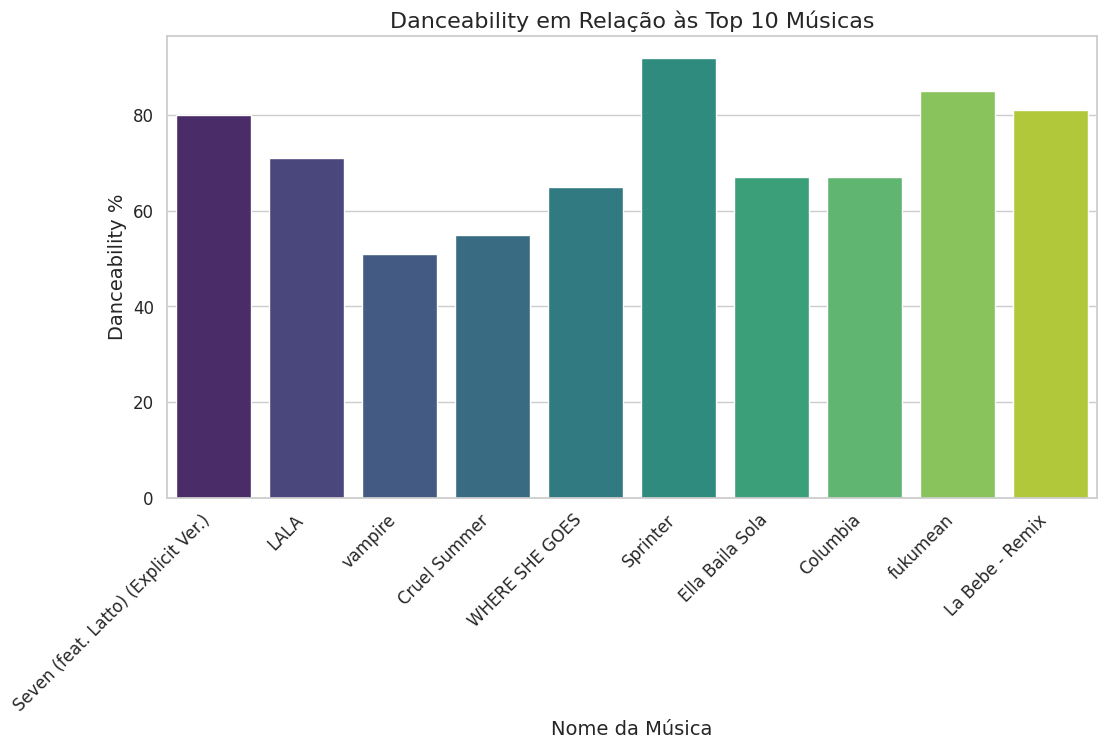

In [ ]:
# Contagem de valores únicos para variáveis categóricas nas top 10 músicas
print("\nContagem de valores únicos para variáveis categóricas nas top 10 músicas:")
for col in top_10.select_dtypes(include='object').columns:
    print(f"{col}: {top_10[col].nunique()} unique values")

# Configurações estéticas do Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura

# Gráfico de barras para uma variável categórica nas top 10 músicas (exemplo: 'track_name')
sns.barplot(x='track_name', y='danceability_%', data=top_10, palette='viridis')
plt.title('Danceability em Relação às Top 10 Músicas', fontsize=16)
plt.xlabel('Nome da Música', fontsize=14)
plt.ylabel('Danceability %', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Ajusta a rotação e alinhamento dos rótulos no eixo x
plt.yticks(fontsize=12)  # Ajusta o tamanho dos rótulos no eixo y
plt.show()


## O gráfico e a resolução

O objetivo desse gráfico é comprovar ou desmintir a nossa tese inicial: "As primeiras 10 músicas do top global de 2023 no Spotify estão nesse ranking por possuírem um alto índice de dançabilidade."

Como é visto no gráfico, a maioria das músicas estão com a dançabilidade acima de 60%, com exceção de duas. Assim, quanto mais próximo de 100% (ou 1), mais alto é o índice de dançabilidade da música, ou seja, é mais adequada para dançar de acordo com as métricas musicais.

Portanto, podemos concluir, com base nessa base de dados do ano de 2023, que as primeiras 10 músicas do top do Spotify possuem uma dançabilidade alta.